In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from merlion.utils import TimeSeries

# We initialize models using the model factory in this tutorial
# We manually set the detection threshold to 2 (in standard deviation units) for all models
from merlion.models.factory import ModelFactory
from merlion.post_process.threshold import AggregateAlarms
from metrics.eval_metrics import *

In [3]:
data_root = 'data/SMD_DA/'
dataset = 'SMD'
train_data = ['tr_3-7'] #['tr_1-1','tr_2-1', 'tr_3-2']
test_data = 'te_3-7'
feat_num = 38

data_path = data_root + '_'.join(['tr_' + '_'.join([i[3:] for i in train_data]), test_data])
print(data_path)

tr_data = np.load(data_path + '/' + dataset + '_train.npy')
te_data = np.load(data_path + '/' + dataset + '_test.npy')
te_label = np.load(data_path + '/' + dataset + '_test_label.npy')

data/SMD_DA/tr_3-7_te_3-7


In [4]:
# Convert dataframe to time series
sel_feats = ['feat_'+str(i) for i in range(feat_num)]
train_data = TimeSeries.from_pd(pd.DataFrame(tr_data, columns=sel_feats))
test_data = TimeSeries.from_pd(pd.DataFrame(te_data, columns=sel_feats))

In [5]:
from merlion.models.anomaly.lstm_ed import LSTMEDConfig, LSTMED

In [6]:
kwargs = {} #{'num_epochs': 0}
config, _ = LSTMEDConfig().from_dict(kwargs, return_unused_kwargs=True)

In [7]:
model_name = 'LSTMED' #'VAE'
# tmp_model = ModelFactory.create(model_name, threshold=AggregateAlarms(alm_threshold=2))
tmp_model = LSTMED(config)

# Get the anomaly score
tr_scores = tmp_model.train(train_data)
tr_scores = tr_scores.to_pd()['anom_score']
te_scores = tmp_model.get_anomaly_score(test_data).to_pd()['anom_score'].tolist()

 |========================================| 100.0% Complete, Loss 87725.2578


In [8]:
# Get the overall evaluation results
results = overall_evaluation(tr_scores, te_scores, te_label)

PA%K
PA%K varying K
PA%K POT
PA%K POT varying K


In [9]:
test_results = results

In [10]:
results_output = ' & '.join([str(i) for i in 
                            [# F1 with optimal threshold
                                test_results['pak']['wo_pa']['basic']['f1'], 
                                test_results['pak']['w_pa']['basic']['f1'], 
                                test_results['pak_vk']['f1'], 
                                # F1 with POT threshold
                                test_results['pak_pot']['wo_pa']['basic']['f1'], 
                                test_results['pak_pot']['w_pa']['basic']['f1'],
                                test_results['pak_vk_pot']['f1'], 
                                # AUCs
                                test_results['pak']['auc']['roc_auc'], 
                                test_results['pak']['auc']['pr_auc'],
                                test_results['pak']['range_auc']['range_roc_auc'],
                                test_results['pak']['range_auc']['range_pr_auc'], 
                                # Running time
                                # train_time, test_time
                            ]])
print(results_output)

0.2994 & 0.9315 & 0.438 & 0.2465 & 0.927 & 0.3398 & 0.6756 & 0.2123 & 0.7216 & 0.1309


In [14]:
# 0.3216 & 0.9338 & 0.4647 & 0.2495 & 0.9259 & 0.3424 & 0.6436 & 0.2314 & 0.6845 & 0.1766
# 0.0333 & 0.9133 & 0.1059 & 0.0086 & 0.4240 & 0.0294 & 0.4978 & 0.0208 & 0.5254 & 0.0205
# 0.1253 & 0.8349 & 0.2200 & 0.0735 & 0.3469 & 0.1321 & 0.6763 & 0.0957 & 0.5497 & 0.0367

# 0.0432 & 0.8238 & 0.1204 & 0.0131 & 0.2550 & 0.0252 & 0.6203 & 0.0259 & 0.4136 & 0.0236 
# 0.0528 & 0.8282 & 0.1525 & 0.0247 & 0.2598 & 0.0365 & 0.6467 & 0.0390 & 0.3980 & 0.0250 (2)
# 0.0528 & 0.8304 & 0.1523 & 0.0248 & 0.2608 & 0.0366 & 0.6462 & 0.0446 & 0.4428 & 0.0262 (1)
# 0.0503 & 0.8249 & 0.1496 & 0.0249 & 0.2618 & 0.0367 & 0.6452 & 0.0356 & 0.3569 & 0.0242 (10)

In [ ]:
# 0.3210 & 0.9315 & 0.4612 & 0.2495 & 0.9259 & 0.3424 & 0.6500 & 0.2295 & 0.6926 & 0.1751 # Random LSTM-ED
# 0.2994 & 0.9315 & 0.4380 & 0.2465 & 0.9270 & 0.3398 & 0.6756 & 0.2123 & 0.7216 & 0.1309 # LSTM-ED

In [30]:
data_root = 'data/SMD_DA/'
dataset = 'SMD'
train_data = ['tr_3-7'] #['tr_1-1','tr_2-1', 'tr_3-2']
test_data = 'te_3-2'
feat_num = 38

data_path = data_root + '_'.join(['tr_' + '_'.join([i[3:] for i in train_data]), test_data])
print(data_path)

tr_data = np.load(data_path + '/' + dataset + '_train.npy')
te_data = np.load(data_path + '/' + dataset + '_test.npy')
te_label = np.load(data_path + '/' + dataset + '_test_label.npy')

data/SMD_DA/tr_3-7_te_3-2


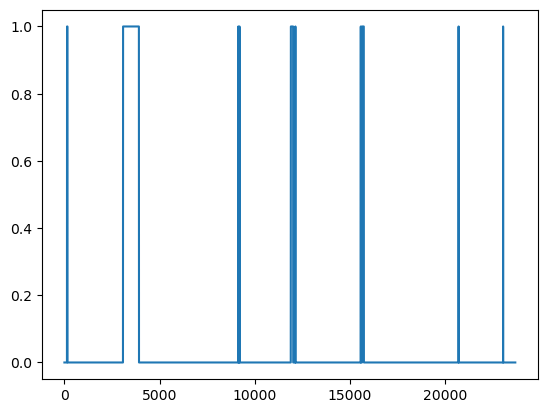

In [31]:
plt.plot(te_label)

In [29]:
pos_idx = [idx for idx in range(len(te_label)) if te_label[idx] == 1]
print(max(pos_idx), len(te_label), len(te_label)-max(pos_idx))

23294 23694 400
